In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# Loading data

In [2]:
crime_data_files=pd.read_csv("C:\\Users\\JOTHISH N\\Desktop\\DS\\CLUSTERING\\crime_data.csv")

In [3]:
crime_data_files

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### Removing columns not needed for clustering

In [6]:
crime_data_mod=crime_data_files.iloc[:,1:]

In [7]:
crime_data_mod

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
ss=StandardScaler()
x=ss.fit_transform(crime_data_mod)

# Hierarchial Clustering

## Dendogram

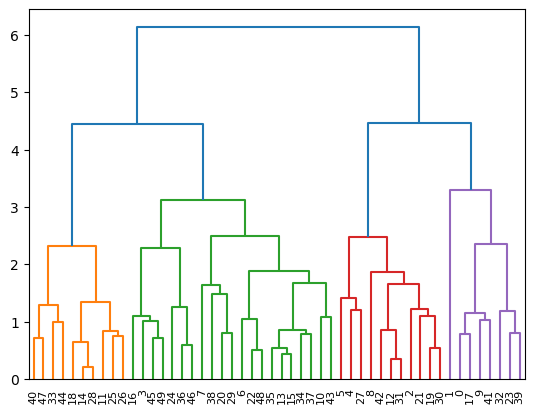

In [7]:
dendrogram = sch.dendrogram(sch.linkage(x, method='complete'))

In [11]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(x)
crime_data_files['cluster_id_hc']=pd.Series(a)
crime_data_files.cluster_id_hc.value_counts()

0    31
2    11
1     8
Name: cluster_id_hc, dtype: int64

In [12]:
crime_data_files.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,5.003226,116.483871,63.838710,16.338710
1,14.087500,252.750000,53.500000,24.537500
2,11.054545,264.090909,79.090909,32.618182


In [13]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(x)
crime_data_files['cluster_id_hc']=pd.Series(a)
crime_data_files.cluster_id_hc.value_counts()

1    21
2    11
3    10
0     8
Name: cluster_id_hc, dtype: int64

In [14]:
crime_data_files.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,14.087500,252.750000,53.500000,24.537500
1,5.871429,134.476190,70.761905,18.580952
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000


In [15]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
a=hc.fit_predict(x)
crime_data_files['cluster_id_hc']=pd.Series(a)
crime_data_files.cluster_id_hc.value_counts()

0    21
2    11
3    10
1     7
4     1
Name: cluster_id_hc, dtype: int64

In [16]:
crime_data_files.groupby('cluster_id_hc').mean()

,Murder,Assault,UrbanPop,Rape
cluster_id_hc,,,,
0,5.871429,134.476190,70.761905,18.580952
1,14.671429,251.285714,54.285714,21.685714
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000
4,10.000000,263.000000,48.000000,44.500000


#Clustering into 4 clusters give the best results.....

## K means clustering..............

### Elbow graph..........

[200.0, 104.96163315756871, 80.0888613219962, 57.55425863091104, 50.52026552535068, 43.927464044975736, 40.52183461131976, 34.68738839784909, 32.70648136388185, 28.31163939712256]


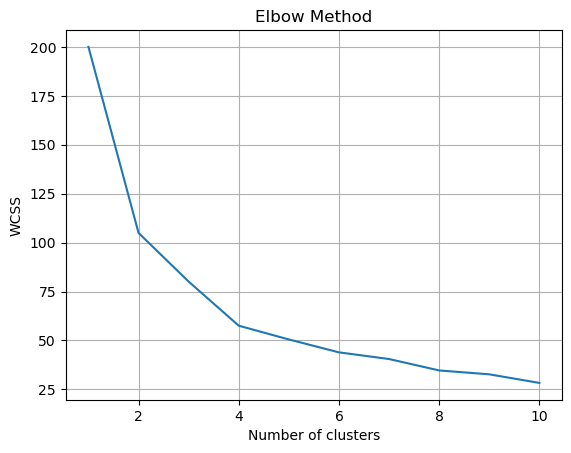

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

### From the elbow graph the inertia increase reduce after 4 clusters

In [17]:
kmeans = KMeans(n_clusters=4,random_state=0)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [18]:
kmeans.labels_

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

In [19]:
crime_data_files['cluster_id_kmeans']=kmeans.labels_

In [20]:
crime_data_files.groupby('cluster_id_kmeans').mean()

,Murder,Assault,UrbanPop,Rape,cluster_id_hc
cluster_id_kmeans,,,,,
0,5.656250,138.875000,73.875000,18.781250,0.000000
1,10.815385,257.384615,76.000000,33.192308,2.000000
2,3.600000,78.538462,52.076923,12.176923,2.307692
3,13.937500,243.625000,53.750000,21.412500,0.875000


#There is reasonable difference between the clusters........

### DBSCAN........

In [21]:
dbscan = DBSCAN(eps=1.0, min_samples=7)
dbscan.fit(x)

DBSCAN(eps=1.0, min_samples=7)

In [22]:
crime_data_files['cluster_id_db']=pd.Series(dbscan.labels_)

In [23]:
crime_data_files.cluster_id_db.value_counts()

-1    28
 0    22
Name: cluster_id_db, dtype: int64

In [24]:
def dbscan(X,eps,min_samples):
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(X)

    
    y_pred=db.fit_predict(X)
    s=metrics.silhouette_score(x,db.labels_)
    plt.scatter(X[:,0],X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

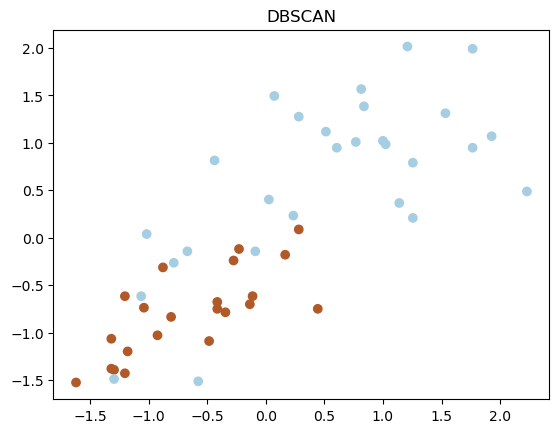

In [23]:
dbscan(x,1,7)

In [25]:
crime_data_files.groupby('cluster_id_db').mean().iloc[:,:4]

,Murder,Assault,UrbanPop,Rape
cluster_id_db,,,,
-1,9.992857,221.785714,69.392857,25.621429
0,4.981818,105.818182,60.636364,15.645455


With DBSCAN best results are achieved with clustering into 2 clusters including outliers:

With hierarchical and kmeans clustering the best results were achieved with 4 clusters: